# Hito 3 - Grupo 8
## Intregrantes
- Vicente González
- Rodrigo Iturrieta
- Pablo Jaramillo
- Cristian Lillo
- Benjamín Valenzuela

## Material

- [Repositorio](https://github.com/propublica/compas-analysis)
- [Video (hito 1)](https://drive.google.com/file/d/1TNpHXC2bTTwXfvSc1zU21SxwGIv-3yGU/view?usp=sharing)


## Introducción

Durante la última década, la sociedad moderna ha estado expuesta a un periodo de disconformidad y crisis. Múltiples protestas han ocurrido a lo largo del mundo, donde se evidencian malestares en temas de discriminación, igualdad y justicia.

Uno de estos movimientos es el de Black Lives Matter, donde la población afroamericana de Estados Unidos ha dejado claro que existe, a día de hoy, un trato desigual debido a la etnia de la persona, donde se mostró al mundo entero un sistema que los desfavorecía enormemente o directamente no esperaban nada de ellos.

La motivación del equipo nace a raíz de estas problemáticas, donde, además, desde un punto de vista de *data mining*, salta a la vista la pregunta: ¿Se puede hacer un modelo que consiga evidenciar la discriminación en una base de datos?

Particularmente, para abarcar esta problemática, se decidió dar enfoque al caso de estudio de COMPAS. En este, se encontró que el modelo predictivo **COMPAS** (Correctional Offender Management Profiling for Alternative Sanctions) otorgaba una evaluación de riesgo mayor a personas afroamericanas que al resto. Es decir, que el modelo "discriminaba" a ciertos grupos de personas basadas en su etnia, marcándolas como potencialmente más propensos a cometer un crimen.

La idea central del proyecto es poder construir un modelo a partir de los datos de COMPAS, para poder evaluar la discriminación en la base de datos. Identificando, además los parámetros bajo los cuales COMPAS hace la discriminación.

## Exploración de datos

[Ver hito 1](hito-1_revision.html)

## Preguntas y Problemas

Dado el análisis realizado, se formularon las siguientes preguntas:

1. ¿Qué características describen mejor un factor de reincidencia?

    Como el objetivo principal de COMPAS es el de predecir la probabilidad de reincidencia de los individuos, es importante saber que el factor de reincidencia no este basado en características inherentes a las personas como lo es edad o lugar de procedencia, mientras que debería estar basada en características conductuales como lo es la gravedad de un crimen cometido.

2. ¿Existirán grupos de personas que compartan la misma tasa de reincidencia? Si existen, ¿Qué atributos componen a dichos grupos?

    Identificar grupos naturales dentro de los datos mostrará de manera más clara si existe algun tipo de sesgo con respecto a la etnia de una persona.

3. ¿Es posible predecir la etnia de una persona en base a atributos del análisis de COMPAS?

    Dependiendo de la eficaz que sea un modelo entrenado con los datos entregados por COMPAS a la hora de predecir la etnia, podemos concluir si existe realmente racismo por parte del modelo.
    
4. Con los datos que se tienen ¿Qué tan bien se puede (predecir/clasificar) el decile_score?

    Es importante poder identficar correctamente los aspectos que influyen en el decile score, para así poder ver si en realidad los resultados se ven afectados por la etnia, o es algún otro parámetro que a su vez este estrechamente relacionado con la etnia, ya sea por temas culturales o sociales.

## Propuesta experimental
Para llevar a cabo la investigación se utilizará la siguiente metodología:

### Preprocesamiento
Se realizara un preprocesamiento de datos, que consiste en sondear los datos para identificar los datos que presentan valores NA o no numericos y se eliminan y/o modifican acordemente, por ejemplo si se quiere crear un clasificador, se utilizaran valores numéricos por lo que se convierten datos tipo fecha a decimales normalizados respecto a la mínima y máxima fecha, o se crean factores ordenados para valores string categoricos, mientras que se pueden eliminar atributos con gran cantidad de valores nulos que no tienen sentido si se les asigna un valor predeterminado, como es la fecha de ocurrencia de un suceso. Un ejemplo del preprocesamiento sería: si se quisiera saber cómo afectaría el sexo, se podría transformar en valor binario dando un valor para masculino y el otro para femenino.

La idea general del proyecto es generar un modelo capaz de predecir la reincidencia de una persona, tratando de evitar que este modelo quede sesgado por la etnia. Asi como hacer un análisis del modelo COMPAS con respecto a su sesgo.

### Pregunta 1
- Se identificarán los atributos importantes usando matriz de correlación.
- Se entrenaran los modelos KNN y Decision Trees usando GridSearch para encontrar los mejores atributos de cada modelo para clasificar o predecir el atributo is_recid, el cual responde a si el individuo será reincidente en el futuro. 
- Se juzgará entorno a el parámetro f1 para determinar los mejores *hiper-parámetros*. Esto debido a que el f1 score mezcla los otros parámetros númericos, por lo que representa de mejor manera el rendimiento de un modelo.
- Se aplicará over y sub sampling a los datos para evitar desequilibrios.
- Dependiendo si el modelo resultante es lo suficientemente satisfactorio, se puede concluir con respecto a la pregunta.


### Pregunta 2
- Esta pregunta se centra en encontrar las columnas que más afectan al `decile_score` por tabla, por lo que nos permitirá encontrar las columnas que más afectaron a COMPAS.
- Para ello añadiremos el `decile_score` a cada tabla y usando los modelos KMeans y Decision Trees, nos centraremos en ir redunciendo la dimensionalidad para obtener mejores resultados.
- Para evaluar el rendimiento de los modelos usaremos el párametro F1. Comparando entre distintos modelos, obtenidos a partir de subconjuntos de columnas, nos permitira concluir que párametros tuvieron más peso dentro del modelo de COMPAS, donde una mejor predicción indica las columnas a usar por tabla para analizar el modelo.
- Una vez encontradas estas columnas, filtraremos todas las tablas para asi trabajar con los datos reducidos.


### Pregunta 3
- Haremos clustering de los datos con el fin de encontrar grupos naturales que se diferencien con respecto al factor de reincidencia. Esto nos permitirá hacer sub-sampling para el resto de preguntas.
- Para ello, tomaremos estas tablas filtradas y se juntaran todas en una tabla única.
- Una vez hecho esto, se quitarán las columnas relacionadas con la reincidencia, para luego aplicar una reducción de dimensionalidad a 2D usando PCA para facilitar la visualización.
- Se aplicarán modelos de clustering (KNN, Jerárquico y DBSCAN) sobre los datos.
- Para cada modelo se identificarán los *hiper-párametros* óptimos utilizando los métodos de rodilla y codo, según corresponda.
- Luego mediremos el porcentaje de reincidencia para cada clúster dentro de cada modelo, usando una división simple entre la cantidad de reincidentes dentro del clúster y las personas totales.
- Nos interesan los clústers con resultados extremos ya que con estos podemos identificar patrones en las demás características que nos permitan concluir ciertos patrones entre grupos que son "muy" reincidentes y los que no lo son.
- Para identificar dichos patrones se recurrirá a una exploración de los datos sobre los clúster, similar a la hecha para la base de datos.

### Pregunta 4
Se seguirá la misma metodología que para la pregunta 1, pero se clasificará para predecir el atributo race usando datos a los cuales COMPAS hubiese tenido acceso y el puntaje de compas para ver si es posible utilizar dicha información para predecir la etnia de un individuo.

### Conclución
Para concluir, se analizarán los resultados obtenidos a través de las preguntas, lo que permitirá evaluar la discriminación dentro de COMPAS.


## Ejecución de preguntas

La limpieza preeliminar de los datos se realizó con este [script](clean_tables.R) de R, con el cual también se exportaron los datos a un csv que se cargan en Python para crear los modelos.

In [1]:
# Imports iniciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC  # support vector machine
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

KeyboardInterrupt: 

In [ ]:
# Los datos cargados con R, los pasamos a csv, para luego leerlos con pandas
casearrest = pd.read_csv('../data/cleaned/casearrest_cl.csv', index_col=0)
jailhistory = pd.read_csv('../data/cleaned/jailhistory_cl.csv', index_col=0)
people = pd.read_csv('../data/cleaned/people_cl.csv', index_col=0)
prisonhistory = pd.read_csv('../data/cleaned/prisonhistory_cl.csv', index_col=0)
charge = pd.read_csv('../data/cleaned/charge_cl.csv', index_col=0)
compas_recid=pd.read_csv('../data/cleaned/compas_recid_cl.csv')
compas_violence=pd.read_csv('../data/cleaned/compas_violence_cl.csv')
main_people = pd.read_csv('../data/cleaned/people_joined_charge_decile.csv', index_col=0).drop('c_days_from_compas', axis=1)


### Pregunta 1


In [ ]:
# Parámetros a utilizar en GridSearch
tuned_parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'weights': ['uniform','distance']}
score = 'f1'

Con fin de analizar la reincidencia se necesita la tabla "people" hasta la columna "is_recid".
Las columnas eliminadas y la razón de esto son las siguientes:
- age: su valor es redundante, entrega la misma info que 'dob' (date of birth).
- race: string, se omite en este caso para comprobar si su presencia influye significantemente en la capacidad predictiva del modelo.
- c_offense_date: contenía valores nulos.

Además de dejar el atributo sexo como binario.

In [ ]:
dataset = people.copy()
dataset = dataset[dataset.columns[0:-9]].drop(columns=["age", "race", "c_offense_date"])
dataset['sex'] = np.where(dataset['sex']=='Male',1,0)

Formamos la matriz de correlación, donde se pueden observar las relaciones entre los distintos atributos. Con respecto a 'is_recid', se pueden distiguir como importantes a los atributos 'decile_score' y 'priors_count'.

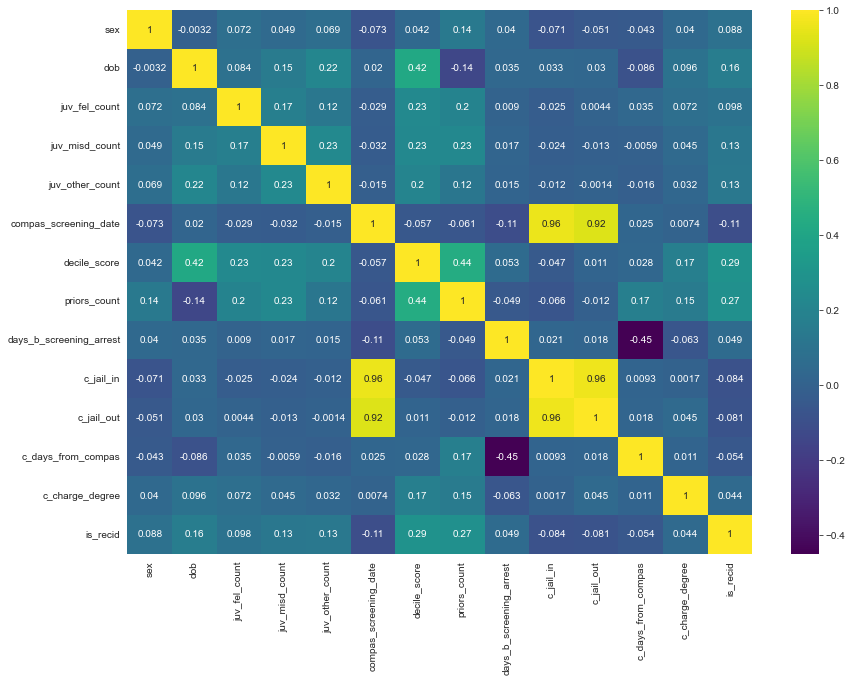

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(dataset.corr(method='spearman'), cmap='viridis', annot=True);

Se entrenan modelos usando GridSearch y K-Neighbours, en la base de datos normalizada. Se realiza también para dataframes con SubSampling y OverSampling para después comparar sus resultados.

In [ ]:
norm_dataset = (dataset -dataset.min())/(dataset.max() -dataset.min())

###separamos valores
data_train, data_test, y_train, y_test = train_test_split(norm_dataset, norm_dataset['is_recid'], test_size=.30,
                                                    random_state=15, stratify=norm_dataset['is_recid'])
##subsampleamos
data_train = data_train.reset_index(drop=True)
idx = np.random.choice(data_train.loc[data_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(data_train[data_train['is_recid'] == 1].index, size=2545)
data_oversampled = data_train.drop(data_train.iloc[idx].index)

### dejamos los datos para trabajar
y_test = data_test.is_recid
X_test = data_test.drop(columns=['is_recid'])
y_orig =data_train.is_recid
X_orig = data_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORIG Mejor combinación de parámetros:
{'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78      2195
         1.0       0.54      0.38      0.45      1104

    accuracy                           0.68      3299
   macro avg       0.63      0.61      0.61      3299
weighted avg       0.67      0.68      0.67      3299



In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(KNeighborsClassifier(),
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.77      0.62      0.69      2195
         1.0       0.45      0.62      0.53      1104

    accuracy                           0.62      3299
   macro avg       0.61      0.62      0.61      3299
weighted avg       0.66      0.62      0.63      3299



In [ ]:
### modelo oversampling
clf_over = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

 OVER Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.70      0.87      0.78      2195
         1.0       0.50      0.26      0.34      1104

    accuracy                           0.67      3299
   macro avg       0.60      0.56      0.56      3299
weighted avg       0.63      0.67      0.63      3299



Se obtuvieron los mejores parámetros para los datos originales y utilizando SubSampling y OverSampling. Sin embargo, en la matriz de correlación se pueden identificar muchos atributos poco relacionados con 'is_recid'. Se probará el omitir algunos de estos para ver si se obtienen mejores resultados.

Se omitirá primero 'days_b_screening_arrest', 'c_days_from_compas' y 'c_charge_degree', pues son los datos con la correlación menos significativa.

In [ ]:
dataset2 = people.copy()
dataset2 = dataset2[dataset2.columns[0:-9]].drop(columns=["age", "race", "c_offense_date", "c_charge_degree", "c_days_from_compas", "days_b_screening_arrest"])
dataset2["sex"] = np.where(dataset2["sex"]=='Male',1,0)

###separamos valores
data_train, data_test, y_train, y_test = train_test_split(dataset2, dataset2['is_recid'], test_size=.30,
                                                    random_state=15, stratify=dataset2['is_recid'])
##subsampleamos
data_train = data_train.reset_index(drop=True)
idx = np.random.choice(data_train.loc[data_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(data_train[data_train['is_recid'] == 1].index, size=2545)
data_oversampled = data_train.drop(data_train.iloc[idx].index)

### dejamos los datos para trabajar
y_test = data_test.is_recid
X_test = data_test.drop(columns=['is_recid'])
y_orig =data_train.is_recid
X_orig = data_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORIG Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      2195
           1       0.52      0.37      0.43      1104

    accuracy                           0.67      3299
   macro avg       0.62      0.60      0.60      3299
weighted avg       0.65      0.67      0.66      3299



In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(KNeighborsClassifier(),
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      2195
           1       0.47      0.62      0.53      1104

    accuracy                           0.64      3299
   macro avg       0.62      0.63      0.62      3299
weighted avg       0.67      0.64      0.64      3299



In [ ]:
### modelo oversampling
clf_over = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

 OVER Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      2195
           1       0.45      0.21      0.29      1104

    accuracy                           0.65      3299
   macro avg       0.57      0.54      0.53      3299
weighted avg       0.61      0.65      0.61      3299



Ahora se omitirán todos los atributos cuya correlación con 'is_recid' esté entre $-0.1$ y $0.1$.

In [ ]:
dataset3 = people.copy()
dataset3 = dataset3[dataset3.columns[0:-9]].drop(columns=["age", "race", "sex", "c_charge_degree", "c_offense_date", "c_days_from_compas", "days_b_screening_arrest", "c_jail_out", "c_jail_in", "juv_fel_count"])

###separamos valores
data_train, data_test, y_train, y_test = train_test_split(dataset3, dataset3['is_recid'], test_size=.30,
                                                    random_state=15, stratify=dataset3['is_recid'])
##subsampleamos
data_train = data_train.reset_index(drop=True)
idx = np.random.choice(data_train.loc[data_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(data_train[data_train['is_recid'] == 1].index, size=2545)
data_oversampled = data_train.drop(data_train.iloc[idx].index)

### dejamos los datos para trabajar
y_test = data_test.is_recid
X_test = data_test.drop(columns=['is_recid'])
y_orig =data_train.is_recid
X_orig = data_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORIG Mejor combinación de parámetros:
{'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      2195
           1       0.51      0.36      0.42      1104

    accuracy                           0.67      3299
   macro avg       0.62      0.59      0.60      3299
weighted avg       0.65      0.67      0.65      3299



In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(KNeighborsClassifier(),
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      2195
           1       0.48      0.61      0.54      1104

    accuracy                           0.65      3299
   macro avg       0.62      0.64      0.62      3299
weighted avg       0.67      0.65      0.65      3299



In [ ]:
### modelo oversampling
clf_over = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

 OVER Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      2195
           1       0.42      0.21      0.28      1104

    accuracy                           0.64      3299
   macro avg       0.55      0.53      0.52      3299
weighted avg       0.60      0.64      0.60      3299



De momento, se obtuvo la Accuracy más alta de $0.68$ utilizando todos los parámetros de la tabla (a excepción de race) y sin realizar ni SubSampling ni OverSampling. Estos valores aún no son suficientes para ayudar a dar una respueta concisa la pregunta propuesta.

Se repetiran los entrenamientos, pero utilizando el atributo 'race'. Al ser un string se pasará a binario, donde si es igual a 'African-American' se le asignara un $1$ y, en caso contrario, un $0$.

Notemos que la correlación entre 'is_recid' y 'race' es bastante menor, con un valor de solo $0.13$.

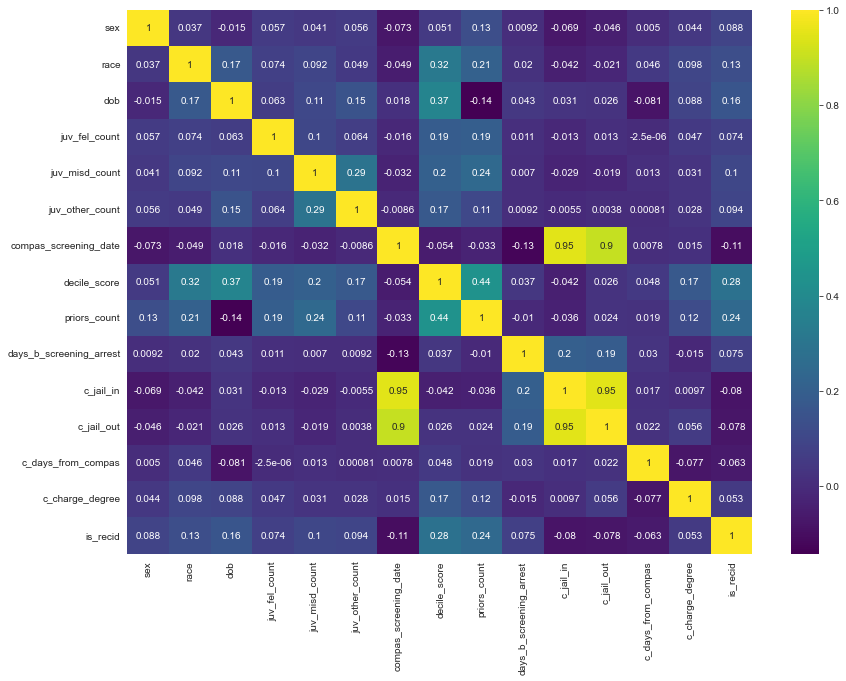

In [ ]:
peoplemejor=people.copy()
peoplemejor['race'] = np.where(peoplemejor['race']=='African-American',1,0)
peoplemejor['sex'] = np.where(peoplemejor['sex']=='Male',1,0)
peoplemejor = peoplemejor[peoplemejor.columns[0:-9]].drop(columns=["age", "c_offense_date"])
plt.figure(figsize=(14, 10))
sns.heatmap(peoplemejor.corr(), cmap='viridis', annot=True);

Entrenar modelos usando GridSearch, etnia y sexo binarios.

In [ ]:
##########################  KNeighbors con race  ##########################
###separamos valores
X_train, X_test, y_train, y_test = train_test_split(peoplemejor, peoplemejor['is_recid'], test_size=.30,
                                                          random_state=15, stratify=peoplemejor['is_recid'])
##subsampleamos
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train.loc[X_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(X_train[X_train['is_recid'] == 1].index, size=2545)
data_oversampled = X_train.drop(X_train.iloc[idx].index)
### dejamos los datos para trabajar
y_test = X_test.is_recid
X_test = X_test.drop(columns=['is_recid'])
y_orig =X_train.is_recid
X_orig = X_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORG Mejor combinación de parámetros:
{'n_neighbors': 10, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      2195
           1       0.51      0.36      0.42      1104

    accuracy                           0.67      3299
   macro avg       0.62      0.59      0.60      3299
weighted avg       0.65      0.67      0.65      3299



In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      2195
           1       0.47      0.62      0.53      1104

    accuracy                           0.64      3299
   macro avg       0.62      0.63      0.62      3299
weighted avg       0.67      0.64      0.65      3299



In [ ]:
### modelo oversampling
clf_over = GridSearchCV(KNeighborsClassifier(),
                        param_grid=tuned_parameters,
                        cv=5,
                        scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

 OVER Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      2195
           1       0.46      0.22      0.30      1104

    accuracy                           0.65      3299
   macro avg       0.58      0.55      0.53      3299
weighted avg       0.61      0.65      0.61      3299



Se repite lo anterior, omitiendo los mismos atributos poco significativos del caso anterior 'days_b_screening_arrest', 'c_days_from_compas' y 'c_charge_degree'.

In [ ]:
peoplemejor2=people.copy()
peoplemejor2['race'] = np.where(peoplemejor2['race']=='African-American',1,0)
peoplemejor2['sex'] = np.where(peoplemejor2['sex']=='Male',1,0)
peoplemejor2 = peoplemejor2[peoplemejor2.columns[0:-9]].drop(columns=["age", "c_charge_degree","c_offense_date", "days_b_screening_arrest", "c_days_from_compas"])

###separamos valores
X_train, X_test, y_train, y_test = train_test_split(peoplemejor2, peoplemejor2['is_recid'], test_size=.30,
                                                          random_state=15, stratify=peoplemejor2['is_recid'])
##subsampleamos
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train.loc[X_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(X_train[X_train['is_recid'] == 1].index, size=2545)
data_oversampled = X_train.drop(X_train.iloc[idx].index)
### dejamos los datos para trabajar
y_test = X_test.is_recid
X_test = X_test.drop(columns=['is_recid'])
y_orig =X_train.is_recid
X_orig = X_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORG Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.73      0.83      0.77      2195
           1       0.53      0.38      0.44      1104

    accuracy                           0.68      3299
   macro avg       0.63      0.60      0.61      3299
weighted avg       0.66      0.68      0.66      3299



In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      2195
           1       0.45      0.61      0.52      1104

    accuracy                           0.62      3299
   macro avg       0.60      0.62      0.60      3299
weighted avg       0.66      0.62      0.63      3299



In [ ]:
### modelo oversampling
clf_over = GridSearchCV(KNeighborsClassifier(),
                        param_grid=tuned_parameters,
                        cv=5,
                        scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

 OVER Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      2195
           1       0.42      0.21      0.28      1104

    accuracy                           0.64      3299
   macro avg       0.55      0.53      0.52      3299
weighted avg       0.59      0.64      0.60      3299



Se realiza el mismo entrenamiento anterior, pero esta vez se omitiran los atributos menos significativos en la segunda matriz de correlación, 'juv_fel_count', 'c_days_from_compas' y 'c_charge_degree'.

In [ ]:
peoplemejor21=people.copy()
peoplemejor21['race'] = np.where(peoplemejor21['race']=='African-American',1,0)
peoplemejor21['sex'] = np.where(peoplemejor21['sex']=='Male',1,0)
peoplemejor21 = peoplemejor21[peoplemejor21.columns[0:-9]].drop(columns=["age", "c_charge_degree","c_offense_date", "juv_fel_count", "c_days_from_compas"])

###separamos valores
X_train, X_test, y_train, y_test = train_test_split(peoplemejor21, peoplemejor21['is_recid'], test_size=.30,
                                                          random_state=15, stratify=peoplemejor21['is_recid'])
##subsampleamos
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train.loc[X_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(X_train[X_train['is_recid'] == 1].index, size=2545)
data_oversampled = X_train.drop(X_train.iloc[idx].index)
### dejamos los datos para trabajar
y_test = X_test.is_recid
X_test = X_test.drop(columns=['is_recid'])
y_orig =X_train.is_recid
X_orig = X_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORG Mejor combinación de parámetros:
{'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2195
           1       0.49      0.39      0.44      1104

    accuracy                           0.66      3299
   macro avg       0.61      0.59      0.60      3299
weighted avg       0.65      0.66      0.65      3299



In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.77      0.62      0.68      2195
           1       0.45      0.63      0.53      1104

    accuracy                           0.62      3299
   macro avg       0.61      0.62      0.61      3299
weighted avg       0.66      0.62      0.63      3299



In [ ]:
### modelo oversampling
clf_over = GridSearchCV(KNeighborsClassifier(),
                        param_grid=tuned_parameters,
                        cv=5,
                        scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

 OVER Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      2195
           1       0.46      0.23      0.30      1104

    accuracy                           0.65      3299
   macro avg       0.57      0.55      0.54      3299
weighted avg       0.61      0.65      0.61      3299



Se repite el entrenamiento, omitiendo todos los atributos cuya correlación con 'is_recid' esté entre $-0.1$ y $0.1$.

In [ ]:
peoplemejor3=people.copy()
peoplemejor3['race'] = np.where(peoplemejor3['race']=='African-American',1,0)
#peoplemejor3['sex'] = np.where(peoplemejor3['sex']=='Male',1,0)
peoplemejor3 = peoplemejor3[peoplemejor3.columns[0:-9]].drop(columns=["age", "sex", "c_charge_degree", "c_offense_date", "c_days_from_compas", "days_b_screening_arrest", "c_jail_out", "c_jail_in", "juv_fel_count", "juv_other_count"])

###separamos valores
X_train, X_test, y_train, y_test = train_test_split(peoplemejor3, peoplemejor3['is_recid'], test_size=.30,
                                                          random_state=15, stratify=peoplemejor3['is_recid'])
##subsampleamos
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train.loc[X_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(X_train[X_train['is_recid'] == 1].index, size=2545)
data_oversampled = X_train.drop(X_train.iloc[idx].index)
### dejamos los datos para trabajar
y_test = X_test.is_recid
X_test = X_test.drop(columns=['is_recid'])
y_orig =X_train.is_recid
X_orig = X_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORG Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2195
           1       0.49      0.38      0.43      1104

    accuracy                           0.66      3299
   macro avg       0.61      0.59      0.59      3299
weighted avg       0.64      0.66      0.65      3299



In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      2195
           1       0.46      0.65      0.54      1104

    accuracy                           0.63      3299
   macro avg       0.62      0.64      0.62      3299
weighted avg       0.67      0.63      0.64      3299



In [ ]:
### modelo oversampling
clf_over = GridSearchCV(KNeighborsClassifier(),
                        param_grid=tuned_parameters,
                        cv=5,
                        scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

 OVER Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      2195
           1       0.46      0.23      0.30      1104

    accuracy                           0.65      3299
   macro avg       0.57      0.55      0.54      3299
weighted avg       0.61      0.65      0.61      3299



Incluyendo el atributo 'race' no se alcanza una Accuracy mayor o igual a la alcanzada anteriormente $0.69$.

Se repetiran todos los entrenamientos anteriores, utilizando Oversampling, Subsampling y tomando en cuenta o no al atributo 'race'. En este caso se utilizará un clasificador de **Decision Tree**, con el fin de abordar más posibilidades y así seleccionar el mejor resultado entre ambos clasificadores.

In [ ]:
dataset = people.copy()
dataset = dataset[dataset.columns[0:-9]].drop(columns=["age", "race", "c_offense_date"])
dataset['sex'] = np.where(dataset['sex']=='Male',1,0)

# Parámetros a utilizar en GridSearch-DecisionTree
tuned_parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                    'criterion': ['gini','entropy']}

Se entrenan modelos usando GridSearch, en la base de datos normalizada. Se realiza también para dataframes con SubSampling y OverSampling.

In [ ]:
norm_dataset = (dataset -dataset.min())/(dataset.max() -dataset.min())

###separamos valores
data_train, data_test, y_train, y_test = train_test_split(norm_dataset, norm_dataset['is_recid'], test_size=.30,
                                                    random_state=15, stratify=norm_dataset['is_recid'])
##subsampleamos
data_train = data_train.reset_index(drop=True)
idx = np.random.choice(data_train.loc[data_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(data_train[data_train['is_recid'] == 1].index, size=2545)
data_oversampled = data_train.drop(data_train.iloc[idx].index)

### dejamos los datos para trabajar
y_test = data_test.is_recid
X_test = data_test.drop(columns=['is_recid'])
y_orig =data_train.is_recid
X_orig = data_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORIG Mejor combinación de parámetros:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      2195
         1.0       0.55      0.52      0.53      1104

    accuracy                           0.70      3299
   macro avg       0.66      0.65      0.65      3299
weighted avg       0.69      0.70      0.69      3299



In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0       0.81      0.63      0.71      2195
         1.0       0.49      0.71      0.58      1104

    accuracy                           0.65      3299
   macro avg       0.65      0.67      0.64      3299
weighted avg       0.70      0.65      0.66      3299



In [ ]:
### modelo oversampling
clf_over = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

 OVER Mejor combinación de parámetros:


KeyboardInterrupt: 

Se realiza otro entrenamiento, omitiendo los parámetros menos significativos 'days_b_screening_arrest', 'c_days_from_compas' y 'c_charge_degree'.

In [ ]:
dataset2 = people.copy()
dataset2 = dataset2[dataset2.columns[0:-9]].drop(columns=["age", "race", "c_charge_degree", "c_offense_date", "c_days_from_compas", "days_b_screening_arrest"])
dataset2["sex"] = np.where(dataset2["sex"]=='Male',1,0)

###separamos valores
data_train, data_test, y_train, y_test = train_test_split(dataset2, dataset2['is_recid'], test_size=.30,
                                                    random_state=15, stratify=dataset2['is_recid'])
##subsampleamos
data_train = data_train.reset_index(drop=True)
idx = np.random.choice(data_train.loc[data_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(data_train[data_train['is_recid'] == 1].index, size=2545)
data_oversampled = data_train.drop(data_train.iloc[idx].index)

### dejamos los datos para trabajar
y_test = data_test.is_recid
X_test = data_test.drop(columns=['is_recid'])
y_orig =data_train.is_recid
X_orig = data_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo oversampling
clf_over = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

Ahora se omitirán todos los atributos cuya correlación con 'is_recid' esté entre $-0.1$ y $0.1$.

In [ ]:
dataset3 = people.copy()
dataset3 = dataset3[dataset3.columns[0:-9]].drop(columns=["age", "race", "sex", "c_charge_degree", "c_offense_date", "c_days_from_compas", "days_b_screening_arrest", "c_jail_out", "c_jail_in", "juv_fel_count"])

###separamos valores
data_train, data_test, y_train, y_test = train_test_split(dataset3, dataset3['is_recid'], test_size=.30,
                                                    random_state=15, stratify=dataset3['is_recid'])
##subsampleamos
data_train = data_train.reset_index(drop=True)
idx = np.random.choice(data_train.loc[data_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(data_train[data_train['is_recid'] == 1].index, size=2545)
data_oversampled = data_train.drop(data_train.iloc[idx].index)

### dejamos los datos para trabajar
y_test = data_test.is_recid
X_test = data_test.drop(columns=['is_recid'])
y_orig =data_train.is_recid
X_orig = data_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo oversampling
clf_over = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

Con el cambio de clasificador se notan dos casos sobresalientes. Ambos no realizan SubSampling ni OverSampling. Se obtuvo un Accuracy de $0.70$ al utilizar todos los atributos (salvo de 'race') y $0.71$ dejando de lado los tres atributos menos significativos.

Se repetiran los entrenamientos, pero utilizando el atributo 'race'.

In [ ]:
peoplemejor=people.copy()
peoplemejor['race'] = np.where(peoplemejor['race']=='African-American',1,0)
peoplemejor['sex'] = np.where(peoplemejor['sex']=='Male',1,0)
peoplemejor = peoplemejor[peoplemejor.columns[0:-9]].drop(columns=["age", "c_charge_degree","c_offense_date"])

Entrenar modelos usando GridSearch, 'race' y sexo binarios.

In [ ]:
##########################  KNeighbors con race  ##########################
###separamos valores
X_train, X_test, y_train, y_test = train_test_split(peoplemejor, peoplemejor['is_recid'], test_size=.30,
                                                          random_state=15, stratify=peoplemejor['is_recid'])
##subsampleamos
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train.loc[X_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(X_train[X_train['is_recid'] == 1].index, size=2545)
data_oversampled = X_train.drop(X_train.iloc[idx].index)
### dejamos los datos para trabajar
y_test = X_test.is_recid
X_test = X_test.drop(columns=['is_recid'])
y_orig =X_train.is_recid
X_orig = X_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo oversampling
clf_over = GridSearchCV(DecisionTreeClassifier(),
                        param_grid=tuned_parameters,
                        cv=5,
                        scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

Se repite lo anterior, omitiendo los atributos poco significativos 'days_b_screening_arrest', 'c_days_from_compas' y 'c_charge_degree'.

In [ ]:
peoplemejor2=people.copy()
peoplemejor2['race'] = np.where(peoplemejor2['race']=='African-American',1,0)
peoplemejor2['sex'] = np.where(peoplemejor2['sex']=='Male',1,0)
peoplemejor2 = peoplemejor2[peoplemejor2.columns[0:-9]].drop(columns=["age", "c_charge_degree","c_offense_date", "days_b_screening_arrest", "c_days_from_compas"])

###separamos valores
X_train, X_test, y_train, y_test = train_test_split(peoplemejor2, peoplemejor2['is_recid'], test_size=.30,
                                                          random_state=15, stratify=peoplemejor2['is_recid'])
##subsampleamos
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train.loc[X_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(X_train[X_train['is_recid'] == 1].index, size=2545)
data_oversampled = X_train.drop(X_train.iloc[idx].index)
### dejamos los datos para trabajar
y_test = X_test.is_recid
X_test = X_test.drop(columns=['is_recid'])
y_orig =X_train.is_recid
X_orig = X_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo oversampling
clf_over = GridSearchCV(DecisionTreeClassifier(),
                        param_grid=tuned_parameters,
                        cv=5,
                        scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

Se realiza el mismo entrenamiento anterior, pero esta vez se omitiran los atributos menos significativos en la segunda matriz de correlación, 'juv_fel_count', 'c_days_from_compas' y 'c_charge_degree'.

In [ ]:
peoplemejor21=people.copy()
peoplemejor21['race'] = np.where(peoplemejor21['race']=='African-American',1,0)
peoplemejor21['sex'] = np.where(peoplemejor21['sex']=='Male',1,0)
peoplemejor21 = peoplemejor21[peoplemejor21.columns[0:-9]].drop(columns=["age", "c_charge_degree","c_offense_date", "juv_fel_count", "c_days_from_compas"])

###separamos valores
X_train, X_test, y_train, y_test = train_test_split(peoplemejor21, peoplemejor21['is_recid'], test_size=.30,
                                                          random_state=15, stratify=peoplemejor21['is_recid'])
##subsampleamos
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train.loc[X_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(X_train[X_train['is_recid'] == 1].index, size=2545)
data_oversampled = X_train.drop(X_train.iloc[idx].index)
### dejamos los datos para trabajar
y_test = X_test.is_recid
X_test = X_test.drop(columns=['is_recid'])
y_orig =X_train.is_recid
X_orig = X_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo oversampling
clf_over = GridSearchCV(DecisionTreeClassifier(),
                        param_grid=tuned_parameters,
                        cv=5,
                        scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

Se repite el entrenamiento, omitiendo todos los atributos cuya correlación con 'is_recid' esté entre $-0.1$ y $0.1$.

In [ ]:
peoplemejor3=people.copy()
peoplemejor3['race'] = np.where(peoplemejor3['race']=='African-American',1,0)
peoplemejor3['sex'] = np.where(peoplemejor3['sex']=='Male',1,0)
peoplemejor3 = peoplemejor3[peoplemejor3.columns[0:-9]].drop(columns=["age", "sex", "c_charge_degree", "c_offense_date", "c_days_from_compas", "days_b_screening_arrest", "c_jail_out", "c_jail_in", "juv_fel_count"])

###separamos valores
X_train, X_test, y_train, y_test = train_test_split(peoplemejor3, peoplemejor3['is_recid'], test_size=.30,
                                                          random_state=15, stratify=peoplemejor3['is_recid'])
##subsampleamos
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train.loc[X_train.is_recid == 0].index, size=2545, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)
##Oversampleamos
idx = np.random.choice(X_train[X_train['is_recid'] == 1].index, size=2545)
data_oversampled = X_train.drop(X_train.iloc[idx].index)
### dejamos los datos para trabajar
y_test = X_test.is_recid
X_test = X_test.drop(columns=['is_recid'])
y_orig =X_train.is_recid
X_orig = X_train.drop(columns=['is_recid'])
y_subs=data_subsampled.is_recid
X_subs=data_subsampled.drop(columns=['is_recid'])
y_over=data_oversampled.is_recid
X_over=data_oversampled.drop(columns=['is_recid'])

### modelo del original
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" ORG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo subsampling
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring=score)
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_subs,y_subs)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
### modelo oversampling
clf_over = GridSearchCV(DecisionTreeClassifier(),
                        param_grid=tuned_parameters,
                        cv=5,
                        scoring=score)
print(" OVER Mejor combinación de parámetros:")
clf_over.fit(X_over,y_over)
print(clf_over.best_params_)

y_pred = clf_over.predict(X_test)

print(classification_report(y_test, y_pred))

Al incluir el atributo 'race' y utilizar Decision Trees no se obtuvieron resultados mejores. De hecho, los casos sobresalientes mencionados anteriormente se repiten.
La mejor Accuracy fue de $0.71$, la cual se obtuvo utilizando Decision Tree y dejando de lado los atributos 'days_b_screening_arrest', 'c_days_from_compas' y 'c_charge_degree'.

Volviendo a la pregunta propuesta: **¿Qué características describen mejor un factor de reincidencia?**
Con los entrenamientos realizados *si se podría* dar una respuesta a esta pregunta. Se puede decir que estos factores son aquellos atributos que estuvieron presentes en todos los entrenamientos, o aquellos presentes en el entrenamiento con mejor Accuracy. Sin embargo esto no sería lo más correcto.

Recordar que se obtuvo una Accuracy de $0.71$ en el mejor modelo, el cual si bien no es perfecto, igual nos entrega una indicación de que los atributos encontrados ayudan a describir el factor de reincidencia criminal. Consideramos entonces que se tiene un modelo mucho más eficaz que el azar, pero no lo suficientemente bueno para poder hacer aseveraciones con confianza sobre un individuo.

### Pregunta 2


In [32]:

def get_best_features(df, target):
    n_of_features = np.arange(1, df.shape[1]+1)
    high_score = 0
    nof = 0
    score_list = []
    for n in n_of_features:
        X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 0)
        model = LinearRegression()
        rfe = RFE(model, n_features_to_select=n)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe, y_train)
        score = model.score(X_test_rfe, y_test)
        score_list.append(score)
        if(score>high_score):
            high_score = score
            nof = n
    return nof, high_score, score_list

#### Tabla `casearrest`

In [33]:
import seaborn as sns



casearrest_X = casearrest.drop(['decile_score'], axis='columns')
casearrest_y = casearrest['decile_score']
nof, high_score, score_list = get_best_features(casearrest_X, casearrest_y)
print('Casearrest:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

# son todas, asi que da igual

Casearrest:
N of features: 3
High score: 0.012440693217863896
Score list: [0.008050461031538392, 0.012089443432227287, 0.012440693217863896]


#### Tabla `jailhistory`

In [ ]:
jailhistory_X = jailhistory.drop(['decile_score'], axis='columns')
jailhistory_y = jailhistory['decile_score']
nof, high_score, score_list = get_best_features(jailhistory_X, jailhistory_y)
print('jailhistory:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

# son todas, asi que da igual


jailhistory:
N of features: 3
High score: 0.16073495854007736
Score list: [0.01205922038852969, 0.037284843185304783, 0.16073495854007736]


#### Tabla `people`

In [35]:
people_filter = people[people.columns[0:-9]].drop(columns=['age'])
people_filter.head()
df_race = pd.get_dummies(people_filter['race'], prefix='race', prefix_sep='_')
df_sex = pd.get_dummies(people_filter['sex'], prefix='sex',
                        prefix_sep='_', drop_first=True)

people_filter = pd.concat([people_filter, df_race, df_sex], axis=1).drop('sex', axis=1).drop('race', axis=1)
people_filter.head()
people_X = people_filter.drop(['decile_score'], axis='columns')
people_y = people_filter['decile_score']
nof, high_score, score_list = get_best_features(people_X, people_y)
print('people:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

# son todas, asi que da igual

people:
N of features: 20
High score: 0.4482377264723971
Score list: [-0.002203948720679083, 0.05160922465324835, 0.054841435580452735, 0.05655485210824118, 0.19831525083241452, 0.21585304056185717, 0.2548896401613516, 0.2955923588089838, 0.2960831310784038, 0.29610748676899323, 0.30004315375235613, 0.3151062780841969, 0.3155863530060272, 0.3230720009696181, 0.32272243939528844, 0.3224268098863966, 0.44768425608582907, 0.44768425608616325, 0.4480347641430945, 0.4482377264723971]


#### Tabla `prisonhistory`

In [36]:
prisonhistory_X = prisonhistory.drop(['decile_score'], axis='columns')
prisonhistory_y = prisonhistory['decile_score']
nof, high_score, score_list = get_best_features(prisonhistory_X, prisonhistory_y)
print('prisonhistory:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

# son todas, asi que da igual

prisonhistory:
N of features: 3
High score: 0.08858798413667879
Score list: [-0.006326693289959051, -0.008560941503100272, 0.08858798413667879]


#### Tabla `charge`

In [37]:
charge_X = charge.drop(['decile_score'], axis='columns')
charge_y = charge['decile_score']
nof, high_score, score_list = get_best_features(charge_X, charge_y)
print('charge:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

# son todas, asi que da igual

charge:
N of features: 5
High score: 0.051760002435358166
Score list: [0.012744096442611985, 0.012744096442611985, 0.04289828847293897, 0.05066701750574043, 0.051760002435358166]


Se nota que para todas las tablas el "N of features" corresponde al numero de atributos que tiene la tabla, por lo que todos los atributos en todas las tablas son relevantes para un mejor reconocimiento del decile_score, juzgando a partir de una regresión lineal.

#### Modelo para predecir decile_scores

Utilizando la tabla people se intentará buscar modelos de KMeans y DecisionTree con los datos originales y subsampleados para ver que tan predecible es el decile_score, se usará unicamente la tabla people puesto que su puntaje de $R^{2}$ fue mucho más alto que para las otras tablas.

In [38]:
# Parámetros a utilizar en GridSearch
tuned_parameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'weights': ['uniform','distance']}

###separamos valores
data_train, data_test, y_train, y_test = train_test_split(people_filter, people_filter['decile_score'], test_size=.30,
                                                    random_state=15, stratify=people_filter['decile_score'])


### dejamos los datos para trabajar
y_test = data_test.decile_score
X_test = data_test.drop(columns=['decile_score'])
y_orig = data_train.decile_score
X_orig = data_train.drop(columns=['decile_score'])


### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring="f1_macro")
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORIG Mejor combinación de parámetros:
{'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           1       0.49      0.59      0.54       709
           2       0.24      0.26      0.25       442
           3       0.17      0.16      0.17       348
           4       0.16      0.17      0.17       337
           5       0.13      0.12      0.12       294
           6       0.12      0.10      0.11       282
           7       0.12      0.11      0.11       259
           8       0.10      0.09      0.09       227
           9       0.14      0.12      0.13       228
          10       0.15      0.13      0.14       173

    accuracy                           0.24      3299
   macro avg       0.18      0.18      0.18      3299
weighted avg       0.23      0.24      0.24      3299



In [39]:
tuned_parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                    'criterion': ['gini','entropy']}

In [40]:
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring="f1_macro")
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

 ORIG Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 4}
              precision    recall  f1-score   support

           1       0.54      0.81      0.65       709
           2       0.25      0.35      0.29       442
           3       0.20      0.12      0.15       348
           4       0.19      0.20      0.19       337
           5       0.15      0.14      0.14       294
           6       0.13      0.09      0.11       282
           7       0.16      0.11      0.13       259
           8       0.18      0.13      0.15       227
           9       0.20      0.12      0.15       228
          10       0.25      0.16      0.20       173

    accuracy                           0.31      3299
   macro avg       0.23      0.22      0.22      3299
weighted avg       0.27      0.31      0.28      3299



Usando los datos orignales se puede encontar que la mejor accuracy que se logró fue del $0.31$ usando DecisionTree

In [ ]:
data_train = data_train.reset_index(drop=True)
data_subsampled = data_train[data_train.decile_score == 10]
for i in range(1,10):
    idx = np.random.choice(data_train.loc[data_train['decile_score'] == i].index, size=404, replace=False)
    data_subsampled = pd.concat([data_subsampled,  data_train.iloc[idx]])

In [42]:
# Parámetros a utilizar en GridSearch
tuned_parameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'weights': ['uniform','distance']}

### dejamos los datos para trabajar
y_test = data_test.decile_score
X_test = data_test.drop(columns=['decile_score'])
y_sub = data_subsampled.decile_score
X_sub = data_subsampled.drop(columns=['decile_score'])


### modelo del original
clf_sub = GridSearchCV(KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring="f1_macro")
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_sub,y_sub)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'n_neighbors': 10, 'weights': 'distance'}
              precision    recall  f1-score   support

           1       0.57      0.44      0.49       709
           2       0.25      0.24      0.25       442
           3       0.15      0.16      0.16       348
           4       0.14      0.13      0.13       337
           5       0.13      0.16      0.15       294
           6       0.08      0.07      0.08       282
           7       0.08      0.08      0.08       259
           8       0.11      0.13      0.12       227
           9       0.15      0.15      0.15       228
          10       0.16      0.24      0.19       173

    accuracy                           0.21      3299
   macro avg       0.18      0.18      0.18      3299
weighted avg       0.24      0.21      0.22      3299



In [ ]:
tuned_parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                    'criterion': ['gini','entropy']}

### dejamos los datos para trabajar
y_test = data_test.decile_score
X_test = data_test.drop(columns=['decile_score'])
y_sub = data_subsampled.decile_score
X_sub = data_subsampled.drop(columns=['decile_score'])


### modelo del original
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring="f1_macro")
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_sub,y_sub)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 12}
              precision    recall  f1-score   support

           1       0.61      0.61      0.61       709
           2       0.23      0.27      0.25       442
           3       0.17      0.18      0.17       348
           4       0.19      0.12      0.15       337
           5       0.13      0.12      0.12       294
           6       0.15      0.10      0.12       282
           7       0.12      0.10      0.11       259
           8       0.11      0.15      0.12       227
           9       0.20      0.22      0.21       228
          10       0.17      0.21      0.19       173

    accuracy                           0.26      3299
   macro avg       0.21      0.21      0.20      3299
weighted avg       0.26      0.26      0.26      3299



Usando los datos subsampleados se obtiene una accuracy de a lo más $0.26$, usando de nuevo DecisionTree. Por lo que se obtiene que usando un modelo relativamente basico se puede lograr acertar a el decile_score que COMPAS asigna a un individuo entre el 26% y 31% de las veces, lo que es considerablemente más alto que el azar. Consideramos esto como un buen resultado considerando la baja cantidad de datos relativa a la cantidad de clases que posee decile_score y el desbalance en la cantidad de población de cada nivel de este.

Antes de concluir veamos que tan influyente es la etnia en la predicción del decile_score para nuestros modelos

In [ ]:
people_filter2 = people[people.columns[0:-9]].drop(columns=['age', 'race'])
df_sex = pd.get_dummies(people_filter2['sex'], prefix='sex',
                        prefix_sep='_', drop_first=True)
people_filter2 = pd.concat([people_filter2, df_sex], axis=1).drop('sex', axis=1)

###separamos valores
data_train, data_test, y_train, y_test = train_test_split(people_filter2, people_filter2['decile_score'], test_size=.30,
                                                    random_state=15, stratify=people_filter2['decile_score'])

data_train = data_train.reset_index(drop=True)
data_subsampled = data_train[data_train.decile_score == 10]
for i in range(1,10):
    idx = np.random.choice(data_train.loc[data_train['decile_score'] == i].index, size=404, replace=False)
    data_subsampled = pd.concat([data_subsampled,  data_train.iloc[idx]])

### dejamos los datos para trabajar
y_test = data_test.decile_score
X_test = data_test.drop(columns=['decile_score'])
y_orig = data_train.decile_score
X_orig = data_train.drop(columns=['decile_score'])


### modelo del original
clf_org = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring="f1_macro")
print(" ORIG Mejor combinación de parámetros:")
clf_org.fit(X_orig,y_orig)

y_pred = clf_org.predict(X_test)

 ORIG Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 11}
              precision    recall  f1-score   support

           1       0.54      0.81      0.65       709
           2       0.25      0.35      0.29       442
           3       0.18      0.15      0.16       348
           4       0.20      0.19      0.19       337
           5       0.14      0.14      0.14       294
           6       0.13      0.08      0.10       282
           7       0.16      0.10      0.12       259
           8       0.19      0.11      0.14       227
           9       0.19      0.12      0.15       228
          10       0.23      0.18      0.20       173

    accuracy                           0.31      3299
   macro avg       0.22      0.22      0.22      3299
weighted avg       0.26      0.31      0.28      3299



In [ ]:
print(clf_org.best_params_)
print(classification_report(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 11}
              precision    recall  f1-score   support

           1       0.54      0.81      0.65       709
           2       0.25      0.35      0.29       442
           3       0.18      0.15      0.16       348
           4       0.20      0.19      0.19       337
           5       0.14      0.14      0.14       294
           6       0.13      0.08      0.10       282
           7       0.16      0.10      0.12       259
           8       0.19      0.11      0.14       227
           9       0.19      0.12      0.15       228
          10       0.23      0.18      0.20       173

    accuracy                           0.31      3299
   macro avg       0.22      0.22      0.22      3299
weighted avg       0.26      0.31      0.28      3299



In [ ]:
y_sub = data_subsampled.decile_score
X_sub = data_subsampled.drop(columns=['decile_score'])


### modelo del original
clf_sub = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=tuned_parameters,
                       cv=5,
                       scoring="f1_macro")
print(" SUB Mejor combinación de parámetros:")
clf_sub.fit(X_sub,y_sub)
print(clf_sub.best_params_)

y_pred = clf_sub.predict(X_test)

print(classification_report(y_test, y_pred))

 SUB Mejor combinación de parámetros:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 3}
              precision    recall  f1-score   support

           1       0.58      0.66      0.62       709
           2       0.25      0.22      0.24       442
           3       0.18      0.30      0.22       348
           4       0.18      0.13      0.15       337
           5       0.11      0.03      0.05       294
           6       0.13      0.16      0.14       282
           7       0.17      0.13      0.15       259
           8       0.14      0.06      0.08       227
           9       0.15      0.16      0.16       228
          10       0.19      0.32      0.24       173

    accuracy                           0.28      3299
   macro avg       0.21      0.22      0.20      3299
weighted avg       0.26      0.28      0.26      3299



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.66      0.62       709
           2       0.25      0.22      0.24       442
           3       0.18      0.30      0.22       348
           4       0.18      0.13      0.15       337
           5       0.11      0.03      0.05       294
           6       0.13      0.16      0.14       282
           7       0.17      0.13      0.15       259
           8       0.14      0.06      0.08       227
           9       0.15      0.16      0.16       228
          10       0.19      0.32      0.24       173

    accuracy                           0.28      3299
   macro avg       0.21      0.22      0.20      3299
weighted avg       0.26      0.28      0.26      3299



Eliminando la etnia de los datos se vuelve a repetir el máximo nivel de accuracy de $0.31$, pero con datos subsampleados se logra subir de $0.26$ a $0.28$, por lo que podemos decir que la influencia de la etnia es ruido para nuestro modelo de predicción del decile_score. Esto se podría interpretar a favor de COMPAS respecto a la alegación de cesgo racial. 

Volviendo entonces a la pregunta: **Con los datos que se tienen ¿Qué tan bien se puede (predecir/agrupar/clasificar) el decile_score?** llegamos a la conclusión que si bien no se puede clasificar el decile_score con un nivel de precisión util, el nivel alcanzado es bastante mejor que el azar, por lo que ciertamente se ha encontrado una relación entre los datos y el algoritmo de COMPAS para asignar puntaje de deciles, pero se estima que faltan datos para lograr obtener una imagen clara de como COMPAS calcula este.

### Pregunta 3


Como se vio en la pregunta 2, las tablas que poseen una gran incidencia en el decile score es principalmente people, por lo que mediante un [script](join_charge_people_compas.R) de R se decide juntar esta con datos relevantes de charge

Porque incluir charge a pesar de su baja correlacion con decile score?

- Consideramos que contiene información util que puede revelar alguna agrupacion natural, ademas de informacion con respecto a la reincidencia
- Jailhistory se descarta por tener datos similares a los de people

In [ ]:
# Load data
main_people = pd.read_csv('../data/cleaned/people_joined_charge_decile.csv', index_col=0).drop('c_days_from_compas', axis=1)
main_people.head()

In [ ]:
# Ahora pasamos los elementos categoricos a numericos
main_people.replace(['Male', 'Female'], [1, 0], inplace=True)
people_race = pd.get_dummies(main_people['race'], prefix='race', prefix_sep="_")
main_people = pd.concat([main_people, people_race], axis=1).drop('race', axis=1)
main_people.head()

In [ ]:
# Como se ve, las columnas que corresponden a reincidencia son is_recid, num_r_cases, charges_recid, charges_total (pues considera los cargos reincidentes), decile_recid, charge_latest (pues puede corresponder a un caso reincidente)
# Entonces las quitamos para hacer el clustering
blind_recid_people = main_people.drop(['is_recid', 'num_r_cases', 'charges_recid', 'charges_total', 'charge_latest', 'decile_recid'], axis=1)
blind_recid_people.head()

In [ ]:
# Ahora revisamos si existen elementos muy correlacionados
plt.figure(figsize=(14, 10))
sns.heatmap(blind_recid_people.corr(), annot=True)

In [ ]:
# Como se ve, la correlacion entre c_jail_in y c_jail_out es muy alta, por lo que podemos dejar compas_screening_date como representante de ambos.
# Lo mismo pasa con min, med y avg degree, con lo cual podemos quedarnos con min
# priors_count y degrees_total tambien, pero a pesar de tener una relación alta, son cosas distintas.
blind_recid_people.drop(['c_jail_in', 'c_jail_out', 'med_degree', 'avg_degree'], axis=1, inplace=True)
plt.figure(figsize=(14, 10))
sns.heatmap(blind_recid_people.corr(), annot=True)

In [ ]:
# Ahora podemos hacer clustering, empezando con KMeans
# Usaremos la técnica del codo
km_sse = []
km_clusters = [i for i in range(1, 16)]
for k in km_clusters:
    kmeans = KMeans(n_clusters=k).fit(blind_recid_people)
    km_sse.append(kmeans.inertia_)

plt.plot(km_clusters, km_sse, marker='o')
plt.title('Método del codo de 1 a 15 clusters')
plt.grid(True)
plt.show()

In [ ]:
# Usaremos 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(blind_recid_people)
km_cl = kmeans.labels_
# Reducimos la dimensionalidad usando PCA para ver los resultados visuales
X = PCA(n_components=2, random_state=0).fit_transform(main_people)
plt.scatter(X[:, 0], X[:, 1], c=km_cl, cmap='rainbow')
plt.title('Clusters de la tabla blind_recid_people usando KMeans')

In [ ]:
# Revisamos el porcentaje de reincidencia por cluster
main_people['km_cl'] = km_cl
main_people.groupby('km_cl').is_recid.mean()

In [ ]:
# Demasiado iguales con respecto a la reincidencia, por lo que cambiamos a DBSCAN
# Usaremos la tecnica de la rodilla para 3 distintos k=[4,5,6]
nbrs = NearestNeighbors(n_neighbors=10).fit(blind_recid_people)
distances, indices = nbrs.kneighbors(blind_recid_people)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Tecnica de la rodilla')
plt.axhline(y=25, color='r', linestyle='--') #Ajuste el valor para y
plt.plot(distances)
plt.show()


In [ ]:
# Nos quedamos con 25 y 4
dbscan = DBSCAN(eps=25, min_samples=10).fit(blind_recid_people)
db_cl = dbscan.labels_
plt.figure(figsize=(14, 10))
plt.title('Clusters de la tabla blind_recid_people usando DBSCAN')
plt.scatter(X[:, 0], X[:, 1], c=db_cl)

In [ ]:
# Revisamos la reincidencia por cluster, filtramos los outlayers
main_people['db_cl'] = db_cl
main_people.groupby('db_cl').is_recid.mean()

In [ ]:
# DBScan no nos da una solucion buena para la reincidencia, pues solo consigue identificar outlayers, por lo mismo, puede que sirva como metodo de subsampling para la clasificacion
main_people.db_cl.value_counts()

In [ ]:
# Ahora vamos a usar agglomerative clustering
complete = linkage(blind_recid_people, 'complete')
single = linkage(blind_recid_people, 'single')
average = linkage(blind_recid_people, 'average')
ward = linkage(blind_recid_people, 'ward')

dendrogram(complete, labels=blind_recid_people.index, orientation='top', leaf_rotation=90)
plt.title('Complete')
plt.show()

In [ ]:
dendrogram(single, labels=blind_recid_people.index, orientation='top', leaf_rotation=90)
plt.title('Single')
plt.show()

In [ ]:
dendrogram(average, labels=blind_recid_people.index, orientation='top', leaf_rotation=90)
plt.title('Average')
plt.show()

In [ ]:
dendrogram(ward, labels=blind_recid_people.index, orientation='top', leaf_rotation=90)
plt.title('Ward')
plt.show()

In [ ]:
# Descartamos el metodo single puesto que no se puede definir la altura de corte de manera visual
# Para complete el trehshold sera de 6000, para average de 3000 y para ward de 1000000
complete_agg = AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=5000).fit(blind_recid_people)
average_agg = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=2500).fit(blind_recid_people)
ward_agg = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=150000).fit(blind_recid_people)

# Ahora revisamos el porcentaje de reincidencia por cluster
main_people['complete_cl'] = complete_agg.labels_
main_people.groupby('complete_cl').is_recid.mean()

In [ ]:
main_people['average_cl'] = average_agg.labels_
main_people.groupby('average_cl').is_recid.mean()

In [ ]:
main_people['ward_cl'] = ward_agg.labels_
main_people.groupby('ward_cl').is_recid.mean()

No se encontraron clusters notables, todos tienen alrededor de un 33% de reincidencia, lo cual es cercano al 33.5% de reincidencia del dataset original.

#### Volviendo a DBSCAN

La observación más interesante es entregada por DBSCAN este nos muestra outliers, pero dichos outliers son notoriamente reincidentes, ahora procederemos a describir este grupo

In [ ]:
outliers = main_people[main_people.db_cl == -1]

reincident_people =  outliers[outliers.is_recid == 1]
not_recid_people = outliers[outliers.is_recid == 0]
reincident_people.describe()

,id,sex,dob,juv_fel_count,juv_misd_count,juv_other_count,compas_screening_date,priors_count,days_b_screening_arrest,c_jail_in,...,decile_violence,decile_fail_to_appear,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,km_cl,db_cl
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.0
mean,5945.309859,0.908451,0.573311,0.408451,0.690141,0.373239,0.939278,20.809859,0.000294,0.939573,...,5.443662,6.267606,0.809859,0.0,0.140845,0.014085,0.007042,0.028169,1.492958,-1.0
std,3339.989095,0.289410,0.099427,1.826344,1.883798,0.888134,0.006250,6.723446,0.002771,0.006534,...,2.553053,2.393595,0.393801,0.0,0.349093,0.118257,0.083918,0.166041,1.115630,0.0
min,54.000000,0.000000,0.298680,0.000000,0.000000,0.000000,0.930230,2.000000,-0.009970,0.930200,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
25%,3209.750000,1.000000,0.493038,0.000000,0.000000,0.000000,0.932743,17.000000,-0.000030,0.932985,...,3.000000,5.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,-1.0
50%,5956.000000,1.000000,0.595600,0.000000,0.000000,0.000000,0.939335,21.000000,-0.000030,0.939760,...,6.000000,7.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,-1.0
75%,8539.000000,1.000000,0.647485,0.000000,0.000000,0.000000,0.945093,25.000000,0.000000,0.945375,...,7.000000,8.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,-1.0
max,11734.000000,1.000000,0.721290,20.000000,13.000000,5.000000,0.949870,38.000000,0.018580,0.952790,...,10.000000,10.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,3.000000,-1.0


In [ ]:
reincident_people.sex.value_counts()

1    129
0     13
Name: sex, dtype: int64

In [ ]:
not_recid_people.sex.value_counts()

1    86
0     2
Name: sex, dtype: int64

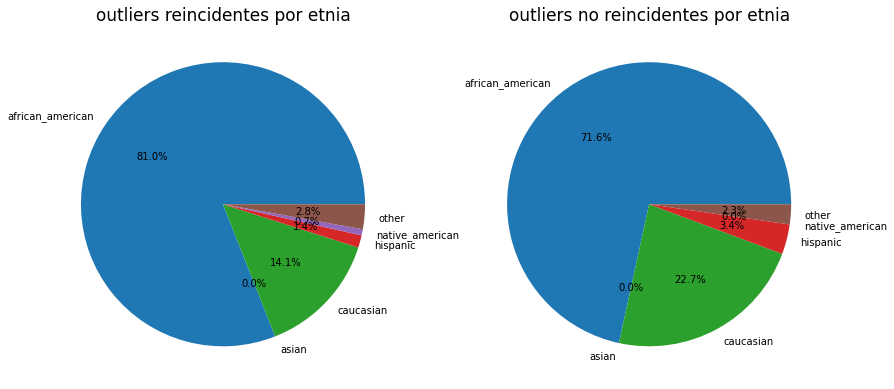

In [ ]:
# Piechart by race
labels = ['african_american', 'asian', 'caucasian', 'hispanic', 'native_american', 'other']

recid_race_count = [len(reincident_people[reincident_people['race_African-American'] == 1]), 
                    len(reincident_people[reincident_people['race_Asian'] == 1]), 
                    len(reincident_people[reincident_people['race_Caucasian'] == 1]),
                    len(reincident_people[reincident_people['race_Hispanic'] == 1]), 
                    len(reincident_people[reincident_people['race_Native American'] == 1]), 
                    len(reincident_people[reincident_people['race_Other'] == 1])
                  ]

not_recid_race_count = [len(not_recid_people[not_recid_people['race_African-American'] == 1]), 
                        len(not_recid_people[not_recid_people['race_Asian'] == 1]), 
                        len(not_recid_people[not_recid_people['race_Caucasian'] == 1]),
                        len(not_recid_people[not_recid_people['race_Hispanic'] == 1]), 
                        len(not_recid_people[not_recid_people['race_Native American'] == 1]), 
                        len(not_recid_people[not_recid_people['race_Other'] == 1])
                        ]

plt.figure(figsize=(14, 10))
plt.subplot(1,2,1)
plt.title('outliers reincidentes por etnia', size=17)
plt.pie(recid_race_count, labels=labels, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title('outliers no reincidentes por etnia', size=17)
plt.pie(not_recid_race_count, labels=labels, autopct='%1.1f%%')
plt.show()



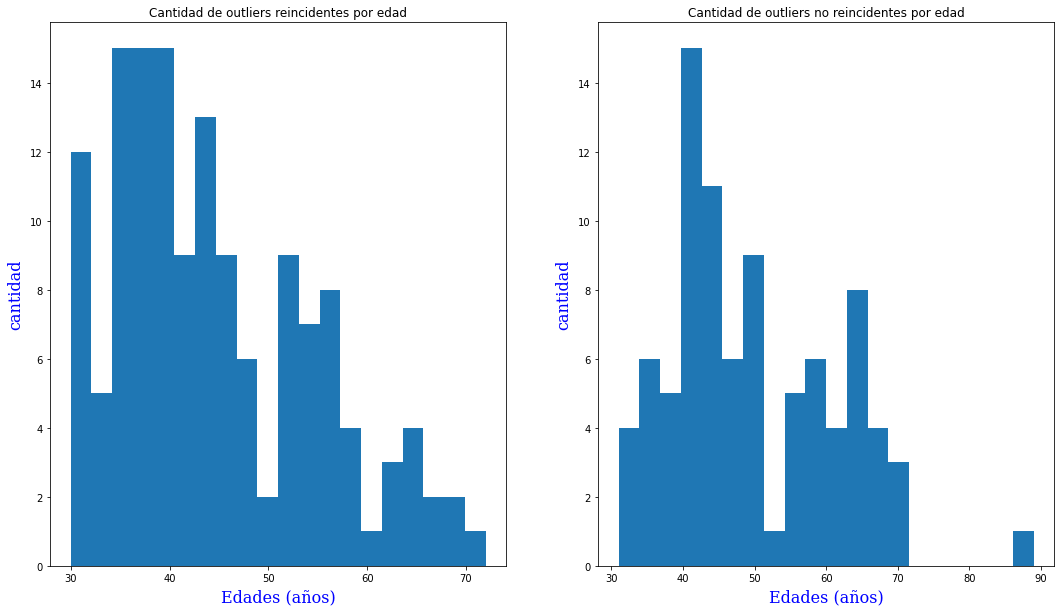

In [ ]:
import datetime

ages_r = reincident_people['dob'] * 36604 - 18342 # float to posix
ages_r = ages_r.map(lambda x:int((datetime.datetime.now() - (datetime.datetime(1970, 1, 1) + datetime.timedelta(seconds=int(86400*x))) ).days//365.25)) # convert to years
ages_nr = not_recid_people['dob'] * 36604 - 18342 # float to posix
ages_nr = ages_nr.map(lambda x:int((datetime.datetime.now() - (datetime.datetime(1970, 1, 1) + datetime.timedelta(seconds=int(86400*x))) ).days//365.25))

plt.figure(figsize=(18, 10))


plt.subplot(1,2,1)
plt.title('Cantidad de outliers reincidentes por edad')
plt.hist(ages_r, bins=20)
plt.xlabel("Edades (años)",
           family='serif',
           color='b',
           weight='normal',
           size = 16,
           labelpad = 6)
plt.ylabel("cantidad",
           family='serif',
           color='b',
           weight='normal',
           size = 16,
           labelpad = 6)
plt.subplot(1,2,2)
plt.title('Cantidad de outliers no reincidentes por edad')
plt.hist(ages_nr, bins=20)
plt.xlabel("Edades (años)",
           family='serif',
           color='b',
           weight='normal',
           size = 16,
           labelpad = 6)
plt.ylabel("cantidad",
           family='serif',
           color='b',
           weight='normal',
           size = 16,
           labelpad = 6)
plt.show()

In [ ]:
reincident_people['max_degree'].value_counts()

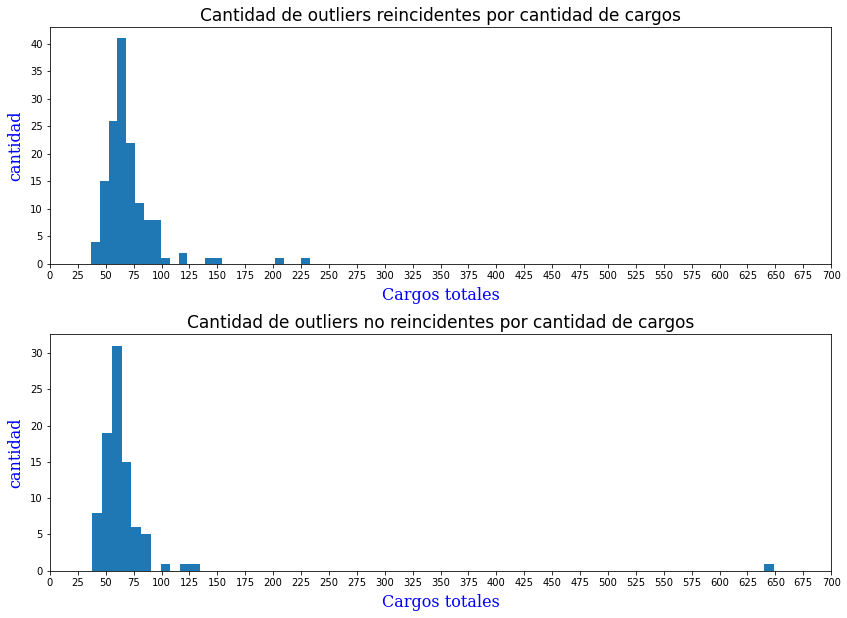

In [ ]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.hist(reincident_people['charges_total'], bins=25)
plt.title('Cantidad de outliers reincidentes por cantidad de cargos', size=17)
plt.xlabel("Cargos totales",
           family='serif',
           color='b',
           weight='normal',
           size = 16,
           labelpad = 6)
plt.ylabel("cantidad",
           family='serif',
           color='b',
           weight='normal',
           size = 16,
           labelpad = 6)
plt.xticks(np.arange(0, 725, 25))
plt.subplot(2,1,2)
plt.hist(not_recid_people['charges_total'], bins=70)
plt.title('Cantidad de outliers no reincidentes por cantidad de cargos', size=17)
plt.xlabel("Cargos totales",
           family='serif',
           color='b',
           weight='normal',
           size = 16,
           labelpad = 6)
plt.ylabel("cantidad",
           family='serif',
           color='b',
           weight='normal',
           size = 16,
           labelpad = 6)
plt.xticks(np.arange(0, 725, 25))
plt.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
# Guardamos la informacion
main_people.to_csv('../data/cleaned/cluster_people.csv', index=False)

#### Conclusión
No se pudieron evidenciar grupos claros que compartan reincidencia, por lo que a priori no existen grupos grandes de personas que definan claramente la reincidencia. Sin embargo, existe un grupo menor "marginado" que posee una muy alta reincidencia. El cual esta compuesto mayoritariamente por hombres (90.8%), afroamericanos (81.0%), normalmente entre los 35 y 47 años aproximadamente (27 y 39 años a la fecha de los datos) y con una gran cantidad de cargos, todos teniendo sobre los 30 cargos y practicamente todos son responsables de felonias.

Volviendo entonces a la pregunta: **¿Existirán grupos de personas que compartan la misma tasa de reincidencia? Si existen, ¿Qué atributos componen a dichos grupos?** Utilizando tecnicas de clustering solo se encontro 1 grupo de personas que componen una tasa de reincidencia notablemente distinta al resto del dataset. Cabe notar que si bien el grupo es de un tamaño menor a 300 personas de aproximadamente 11000, aún así logra encajar con una imagen estereotipica del criminal popularizado por la cultura estado unidense.

### Pregunta 4


In [ ]:
# Parámetros a utilizar en GridSearch
tuned_parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],'weights': ['uniform','distance']}
score = 'f1'

Con fin de analizar la etnia se necesita la tabla "people" hasta la columna "is_recid".
Las columnas eliminadas y la razón de esto son las siguientes:
- age: su valor es redundante pues entrega la misma info que 'dob' (date of birth).
- c_offense_date: contiene valores nulos.

Además de dejar el atributos de sexo  y etnia en binario. Al ser los valores de 'race' strings, se reemplazarán por $1$ si es igual a 'African-American' y $0$ en caso contrario.

In [ ]:
dataset = people.copy()
dataset = dataset[dataset.columns[0:-9]].drop(columns=['age', 'c_offense_date'])
dataset['sex'] = np.where(dataset['sex']=='Male', 1, 0)
dataset['race'] = np.where(dataset['race']=='African-American', 1, 0)

Formamos la matriz de correlación, donde se pueden observar las relaciones entre los distintos atributos. Con respecto a 'race', se puede distiguir como importante el atributo 'decile_score'.

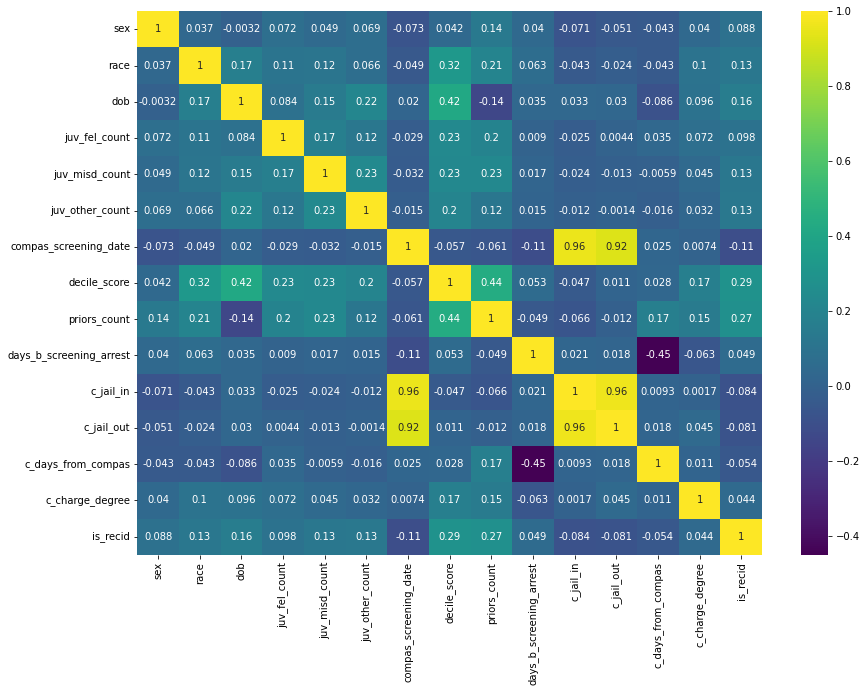

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(dataset.corr(method='spearman'), cmap='viridis', annot=True);

Se entrenan modelos usando GridSearch y K-Neighbors, en la base de datos normalizada. No será necesario evaluar con subsampling y oversampling pues la diferencia entre la cantidad de gente afroamericana y la que no, para el estudio, es de solo 17 personas.

In [ ]:
norm_dataset = (dataset-dataset.min()) / (dataset.max()-dataset.min())

# Separamos valores
data_train, data_test, y_train, y_test = train_test_split(norm_dataset, norm_dataset['race'], test_size=0.30,
                                                            random_state=15, stratify=norm_dataset['race'])

# Dejamos los datos para trabajar
y_test = data_test.race
X_test = data_test.drop(columns=['race'])
y_orig =data_train.race
X_orig = data_train.drop(columns=['race'])

# Modelo
clf_org = GridSearchCV(KNeighborsClassifier(), param_grid=tuned_parameters, cv=5, scoring=score)
print('ORIG Mejor combinación de parámetros:')
clf_org.fit(X_orig, y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

ORIG Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.60      1653
         1.0       0.60      0.61      0.61      1646

    accuracy                           0.60      3299
   macro avg       0.60      0.60      0.60      3299
weighted avg       0.60      0.60      0.60      3299



En la matriz de correlación se pueden identificar muchos atributos poco relacionados con 'race'. Se probará el omitir algunos de estos para ver si se obtienen mejores resultados.

Se omitirá primero 'sex', 'compas_screening_date', 'c_jail_in', 'c_jail_out' y 'c_days_from_compas', pues son los datos con la correlación menos significativa.

In [ ]:
dataset2 = people.copy()
dataset2 = dataset2[dataset2.columns[0:-9]].drop(columns=['sex', 'age', 'compas_screening_date', 'c_jail_in', 'c_jail_out', 'c_days_from_compas', 'c_offense_date',])
dataset2['race'] = np.where(dataset2['race']=='African-American', 1, 0)

# Separamos valores
data_train, data_test, y_train, y_test = train_test_split(dataset2, dataset2['race'], test_size=0.30,
                                                            random_state=15, stratify=dataset2['race'])

# Dejamos los datos para trabajar
y_test = data_test.race
X_test = data_test.drop(columns=['race'])
y_orig =data_train.race
X_orig = data_train.drop(columns=['race'])

# Modelo
clf_org = GridSearchCV(KNeighborsClassifier(), param_grid=tuned_parameters, cv=5, scoring=score)
print('ORIG Mejor combinación de parámetros:')
clf_org.fit(X_orig, y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

ORIG Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1653
           1       0.61      0.61      0.61      1646

    accuracy                           0.61      3299
   macro avg       0.61      0.61      0.61      3299
weighted avg       0.61      0.61      0.61      3299



Ahora se omitirán todos los atributos cuya correlación con 'race' esté entre $-0.1$ y $0.1$.

In [ ]:
dataset3 = people.copy()
dataset3 = dataset3[dataset3.columns[0:-9]].drop(columns=['sex', 'age', 'juv_other_count', 'compas_screening_date', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_days_from_compas', 'c_offense_date', 'c_charge_degree'])
dataset3['race'] = np.where(dataset3['race']=='African-American', 1, 0)

# Separamos valores
data_train, data_test, y_train, y_test = train_test_split(dataset3, dataset3['race'], test_size=0.30,
                                                            random_state=15, stratify=dataset3['race'])

# Dejamos los datos para trabajar
y_test = data_test.race
X_test = data_test.drop(columns=['race'])
y_orig =data_train.race
X_orig = data_train.drop(columns=['race'])

### modelo del original
clf_org = GridSearchCV(KNeighborsClassifier(), param_grid=tuned_parameters, cv=5, scoring=score)
print('ORIG Mejor combinación de parámetros:')
clf_org.fit(X_orig, y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

ORIG Mejor combinación de parámetros:
{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      1653
           1       0.60      0.61      0.60      1646

    accuracy                           0.60      3299
   macro avg       0.60      0.60      0.60      3299
weighted avg       0.60      0.60      0.60      3299



De momento, la Accuracy más alta que se obtuvo fue de $0.61$ al quitar las variables con menos influencia en 'race', pero este resultado aún no es suficiente para ayudar a dar una respueta concisa a la pregunta propuesta.

Se repetiran todos los entrenamientos anteriores, con la diferencia que se utilizará un clasificador de **Decision Tree** con el fin de abordar más posibilidades y así seleccionar el mejor resultado entre ambos clasificadores.

In [ ]:
dataset = people.copy()
dataset = dataset[dataset.columns[0:-9]].drop(columns=['age', 'c_offense_date'])
dataset['sex'] = np.where(dataset['sex']=='Male', 1, 0)
dataset['race'] = np.where(dataset['race']=='African-American', 1, 0)

# Parámetros a utilizar en GridSearch-DecisionTree
tuned_parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_leaf': [1, 2, 3, 4, 5],
                    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'criterion': ['gini','entropy']}

Se entrenan modelos usando GridSearch, en la base de datos normalizada.

In [ ]:
norm_dataset = (dataset-dataset.min()) / (dataset.max()-dataset.min())

# Separamos valores
data_train, data_test, y_train, y_test = train_test_split(norm_dataset, norm_dataset['race'], test_size=0.30,
                                                        random_state=15, stratify=norm_dataset['race'])

# Dejamos los datos para trabajar
y_test = data_test.race
X_test = data_test.drop(columns=['race'])
y_orig =data_train.race
X_orig = data_train.drop(columns=['race'])

# Modelo
clf_org = GridSearchCV(DecisionTreeClassifier(), param_grid=tuned_parameters, cv=5, scoring=score)
print('ORIG Mejor combinación de parámetros:')
clf_org.fit(X_orig, y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

ORIG Mejor combinación de parámetros:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0       0.64      0.59      0.61      1653
         1.0       0.62      0.66      0.64      1646

    accuracy                           0.63      3299
   macro avg       0.63      0.63      0.63      3299
weighted avg       0.63      0.63      0.63      3299



Se realiza otro entrenamiento, omitiendo los parámetros menos significativos: 'sex', 'compas_screening_date', 'c_jail_in', 'c_jail_out' y 'c_days_from_compas'

In [ ]:
dataset2 = people.copy()
dataset2 = dataset2[dataset2.columns[0:-9]].drop(columns=['sex', 'age', 'compas_screening_date', 'c_jail_in', 'c_jail_out', 'c_days_from_compas', 'c_offense_date'])
dataset2['race'] = np.where(dataset2['race']=='African-American', 1, 0)

# Separamos valores
data_train, data_test, y_train, y_test = train_test_split(dataset2, dataset2['race'], test_size=0.30,
                                                            random_state=15, stratify=dataset2['race'])

# Dejamos los datos para trabajar
y_test = data_test.race
X_test = data_test.drop(columns=['race'])
y_orig =data_train.race
X_orig = data_train.drop(columns=['race'])

# Modelo
clf_org = GridSearchCV(DecisionTreeClassifier(), param_grid=tuned_parameters, cv=5, scoring=score)
print('ORIG Mejor combinación de parámetros:')
clf_org.fit(X_orig, y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

ORIG Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1653
           1       0.63      0.63      0.63      1646

    accuracy                           0.63      3299
   macro avg       0.63      0.63      0.63      3299
weighted avg       0.63      0.63      0.63      3299



Ahora se omitirán todos los atributos cuya correlación con 'race' esté entre $-0.1$ y $0.1$.

In [ ]:
dataset3 = people.copy()
dataset3 = dataset3[dataset3.columns[0:-9]].drop(columns=['sex', 'age', 'juv_other_count', 'compas_screening_date', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_days_from_compas', 'c_offense_date', 'c_charge_degree'])
dataset3['race'] = np.where(dataset3['race']=='African-American', 1, 0)

# Separamos valores
data_train, data_test, y_train, y_test = train_test_split(dataset3, dataset3['race'], test_size=0.30,
                                                            random_state=15, stratify=dataset3['race'])

# Dejamos los datos para trabajar
y_test = data_test.race
X_test = data_test.drop(columns=['race'])
y_orig =data_train.race
X_orig = data_train.drop(columns=['race'])

# Modelo
clf_org = GridSearchCV(DecisionTreeClassifier(), param_grid=tuned_parameters, cv=5, scoring=score)
print('ORIG Mejor combinación de parámetros:')
clf_org.fit(X_orig, y_orig)
print(clf_org.best_params_)

y_pred = clf_org.predict(X_test)

print(classification_report(y_test, y_pred))

ORIG Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8}
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1653
           1       0.61      0.67      0.64      1646

    accuracy                           0.62      3299
   macro avg       0.62      0.62      0.62      3299
weighted avg       0.62      0.62      0.62      3299



Con el cambio de clasificador se notan dos casos sobresalientes. Se obtuvo un Accuracy de $0.63$ al utilizar todos los atributos disponibles y el mismo valor se obtuvo dejando de lado los cinco atributos menos significativos.

La mejor Accuracy que se logro fue de $0.63$, la cual se obtuvo utilizando Decision Tree junto con todos los atributos disponibles, sin embargo también se puede llegar a este valor sin incluir los cinco atributos menos significativos(sex, compas_scrrening_date, c_jail_in, c_jail_out y days_from_compas) y aplicando el Decision Tree.

Volviendo a la pregunta propuesta: **¿Es posible predecir la etnia de una persona en base a atributos del análisis de COMPAS?**
Con las pruebas realizadas *si se podría* llegar a dar una respuesta a esta pregunta, pero no esta muy lejos del azar la respuesta. Se puede decir que hay factores que pueden llegar a predecir la raza y son aquellos atributos que estuvieron presentes en todos los entrenamientos, o aquellos presentes en el entrenamiento con mejor Accuracy. Sin embargo esto no es lo más correcto.

Recordar que solo se obtuvo una Accuracy de a lo más $0.63$, la cual no consideramos como un valor lo suficientemente alto para afirmar que aquellos atributos encontrados describen la etnia a la que pertenece la persona y que no es simple azar.

Estas características que logran identificar si una persona es afroamericana o no, existen, pero no con una influencia que nos permita asegurar que, conociendo estas, se pueda estimar con seguridad la etnia de un individuo.

## Contribuciones
-   Vicente González: Redactó y planifico la propuesta experimental.
-   Rodrigo Iturrieta: Realizó la respuesta preliminar a la pregunta 1.
-   Pablo Jaramillo: Corrigió los fallos del hito 1 con respecto a la exploración de datos e hizo preprocesamiento de los datos.
-   Cristián Lillo: Creó la presentación.
-   Benjamin Valenzuela: Ayudó a la planificación de la propuesta experimental, asi como en la presentación.